In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import skimage.io
from PIL import Image
from io import BytesIO
import base64

In [2]:
data_folder="/Users/kanhua/Dropbox/Programming/lyft-challenge/data"

In [3]:
test_file=os.path.join(data_folder,"CameraRGB/258.png")
test_file_label=os.path.join(data_folder,"CameraSeg/258.png")

In [4]:
test_file

'/Users/kanhua/Dropbox/Programming/lyft-challenge/data/CameraRGB/258.png'

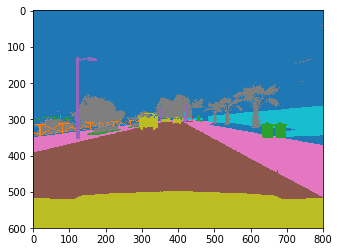

In [5]:
img_label=skimage.io.imread(test_file_label,format="png")
plt.imshow(img_label[:,:,0],cmap="tab10")

In [6]:
binary_label=(img_label[:,:,0]==7)
binary_label

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

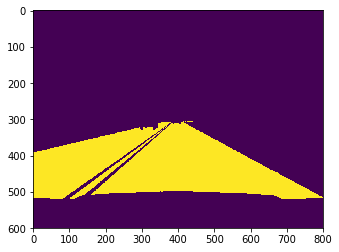

In [7]:
plt.imshow(binary_label)

In [8]:
binary_label

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
pimg=Image.fromarray(binary_label)

In [10]:
import pickle

In [11]:
fp=open("temp.dump",'rb')
pickel_img=pickle.load(fp)
fp.close()

In [13]:
type(pickel_img)

numpy.ndarray

In [14]:
pickel_img.shape

(640, 832, 1)

In [15]:
pickel_img=pickel_img.astype(np.bool).reshape(*pickel_img.shape[0:2])

In [16]:
import skimage.transform
pickel_img=skimage.transform.resize(pickel_img,(600,800))

/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [17]:
pickel_img=pickel_img.astype(np.uint8)

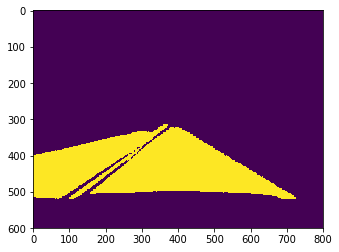

In [18]:
plt.imshow(pickel_img)

In [23]:
pickel_img.max()

1

In [19]:
pimg=Image.fromarray(pickel_img)

In [20]:
def encode(array):
    pil_img = Image.fromarray(array)
    buff = BytesIO()
    pil_img.save(buff, format="PNG")
    return base64.b64encode(buff.getvalue()).decode("utf-8")

In [21]:
encode(pickel_img)

'iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAAAAAC/Hd2sAAALBElEQVR4nO3dbZOjKBQGUNya//+X3Q/pTpvE96Bc4Jyq6drZpKaN8HhB0aQEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAEUPpDeAgLXaX6Z4ei20FB/0rvQF9cByq1X+lNwAiExBYISCXGobHn1emIPUwOL7U7O6Vj4qoILeTj5o4i3WdYS4Kq/EYtt/CvQTkQpvj1583jK9/JRBtcpmFXTuThvHtzUpIHAJymZldO66/vPBOCjLEusp6AByYKqGhLjK3Y8fVV1feTjEqyDU2xlfUwnUQWGGIdYnP3Tquv7xA1SlNQHKb36Pj1htWSElB5iB55Y8HRZmD3EA+6qWC7HbuYvfrG+WjNlps3cr+eSwQGdPwG4L1Sx9b/9wmU5ESBGRJlj2zf23JsX+Luxhizcp/3HAkqpN2+5Bzl1yxkF0luZMK8ibrEUNfrp6ATEkHbwTk6cLRpoFstQTkV+ZOfHBpO0FpvUt2wR3xMIS7gwpyKcef2vUcEL2XTd0FZEjj5ckw+GlHN0fRGz/oytKsC34Nl+oiIHd+yGe3veWXCsnVOghIu/F4+51coOk5yO3p11eb02ZACtVFFwfb02JLlvpMJcZXr7+Y7JoKSOEPc9PZq7XfTW4e2pBNyXzMfM8bWTQyBwnTPcJsCHm0EBC